In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import helper

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import scipy

In [56]:
data = pd.read_csv('Pokemon.csv')
data.head(n = 10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [57]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [58]:
data.loc[data['Type 2'].isnull(), 'Type 2'] = 'missing'

In [59]:
data.drop(labels = ['Name', '#'], inplace = True, axis = 1)

In [60]:
data.isnull().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [45]:
data.dtypes

Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

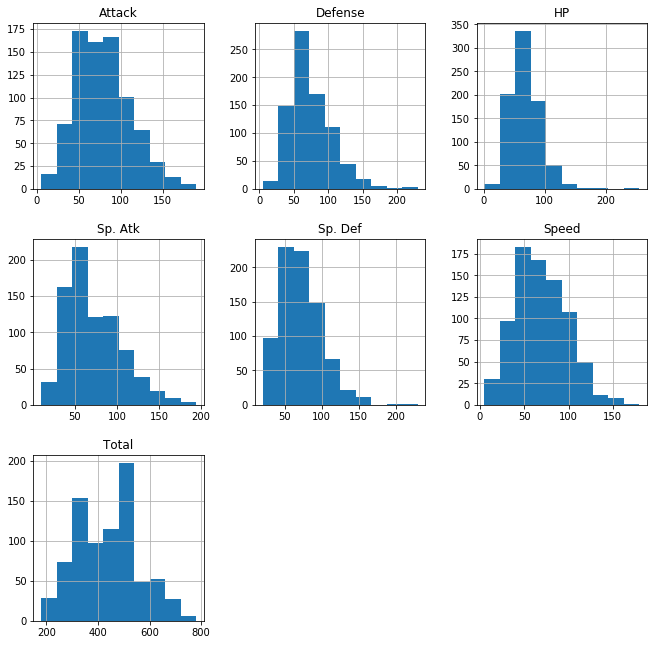

In [52]:
#Univariate Analysis
def uni_con_dist(data, to_leave = None):
  data.drop(to_leave, axis = 1, inplace = True)
  data[data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values].hist(figsize=[11,11])
  
  hist_data = {}
  for col in data[data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values].columns.values:
    hist_data[col + '_count'], hist_data[col + '_division'] = np.histogram(data[col])
  
uni_con_dist(data.copy(deep = False), to_leave = 'Generation')

            Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.717609  0.575943
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.747250  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.717609  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  0.259133  1.000000


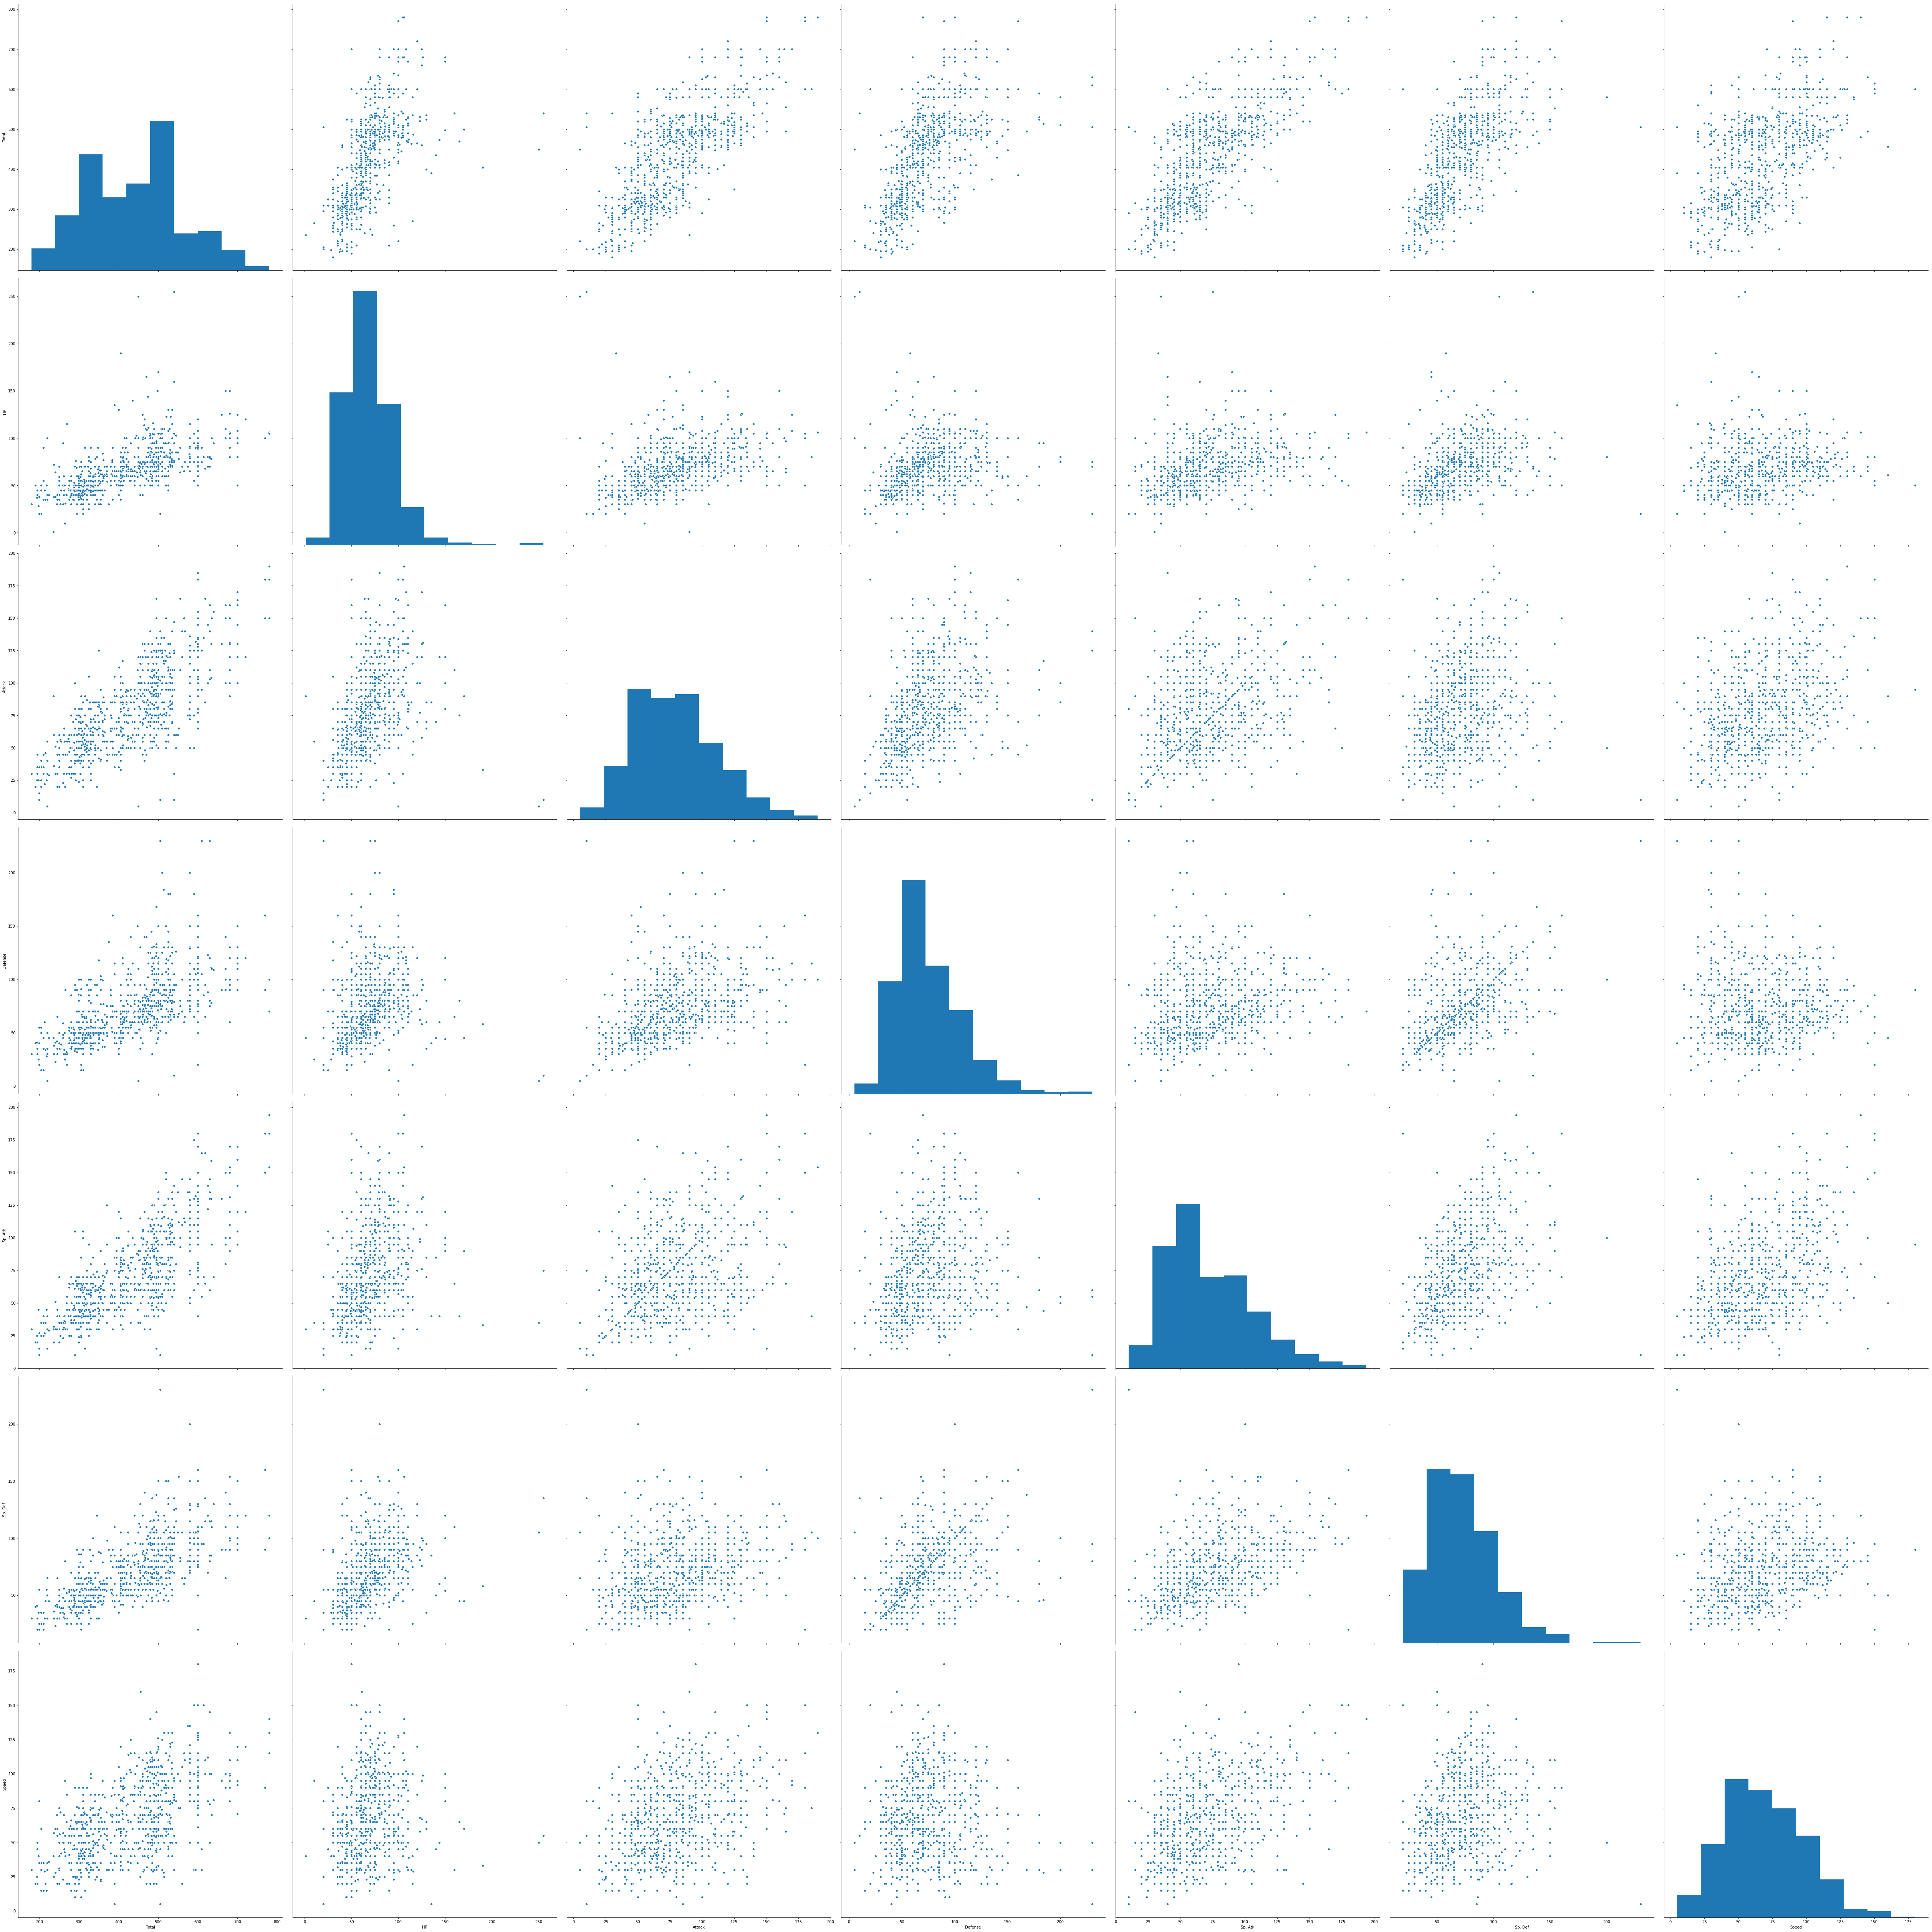

In [71]:
#Biavariate Con-Con
def bi_con_con(data, to_leave, size = 10):
    data.drop(to_leave, axis = 1, inplace = True)
    sns.pairplot(data.loc[:, data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values], size = size)
    data_corr = data.loc[:, data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values].corr()
    print(data_corr)

bi_con_con(data.copy(deep = False), to_leave = ['Generation'])

In [76]:
#Biavariate Cat-Cat Two Way table
def bi_cat_cat_2way(label1, label2, data):
  two_way = {}
  two_way['normal'] = pd.crosstab(index=data[label1], columns=data[label2], margins=True)# Usual 2 way table b/w 2 categorical vars
  two_way['total_prop'] = two_way['normal']/two_way['normal'].loc["All","All"] #to get the total proportion of counts in each cell,
                                                                               #divide the table by the grand total
  two_way['col_prop'] = two_way['normal']/two_way['normal'].loc["All", :]
  two_way['row_prop'] = (two_way['normal'].T/two_way['normal']['All']).T
  return two_way

two_way_normal = bi_cat_cat_2way(label1 = 'Type 1', label2 = 'Type 2', data = data.copy(deep = False))['normal']
two_way_normal

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,missing,All
Type 1,,,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1,17,69
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0,10,31
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0,11,32
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,0,0,0,3,1,27,44
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,15,17
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,0,2,0,20,27
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,0,2,1,1,1,28,52
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,4,0,0,0,0,10,32


In [84]:
#Bivariate Cat-Cat Chi Square and Cramers'V #Used when 2 Way table > 2 X 2
def bi_cat_cat_cramerV(two_way_normal):
  observed = two_way_normal.iloc[0:-1,0:-1]
  chi_stat, p_val, df, expected = scipy.stats.chi2_contingency(observed)
  cramers_v = np.sqrt(chi_stat/(two_way_normal['All'].iloc[-1] *(min(observed.shape)-1)))
  chi2_contingency = {}
  for name in ['chi_stat','p_val','df','expected', 'cramers_v']:
    chi2_contingency[name] = eval(name)
  #chi2_contingency = dict((name,eval(name)) for name in ['chi_stat','p_val','df','expected'])
  #chi2_contingency['cramers_v'] = cramers_v
  return chi2_contingency

bi_cat_cat_cramerV(two_way_normal)['cramers_v']


0.24797228513443442

Cramer's V suggests a moderate correlation between the two categories 

# Applying a Classification Model(KNN Model)


In [20]:
data = pd.get_dummies(data, columns = ['Type 1', 'Type 2'])

In [21]:
data['Legendary'] = le.fit_transform(data['Legendary'])

In [22]:
data.head(n = 10)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Type 2_missing
0,318,45,49,49,65,65,45,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,405,58,64,58,80,65,80,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,534,78,84,78,109,85,100,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,634,78,130,111,130,85,100,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,634,78,104,78,159,115,100,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,314,44,48,65,50,64,43,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
x = data.drop(labels = 'Legendary', axis = 1)
y = data['Legendary']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.125, random_state = 0)

In [25]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
classifier = KNeighborsClassifier()

classifier.fit(x_train, y_train)
prediction = classifier.predict(x_test)

In [27]:
#Making the Confusion Matrix - Evaluation Metric
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, prediction)
print(cm)

print('Accuracy')

[[92  0]
 [ 8  0]]
Accuracy


In [28]:
def uni_con_dist(data, to_leave = None):
  import numpy as np
  data.drop(to_leave, axis = 1, inplace = True)
  data[data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values].hist(figsize=[11,11])
  
  hist_data = {}
  for col in data[data.dtypes[((data.dtypes=="float64")|(data.dtypes=="int64"))].index.values].columns.values:
    hist_data[col + '_count'], hist_data[col + '_division'] = np.histogram(data[col])
  
  return hist_data